# NYPD Arrest Data

### About the Dataset:
- This is a breakdown of every arrest effected in NYC by the NYPD during the current year.
- This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning.
- Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.
- In addition, information related to suspect demographics is also included.
- This data can be used by the public to explore the nature of police enforcement activity.

### Dataset Description
The dataset retrieved from 'NYC OpenData'. This has information about number of arrests made in the current fiscal year(2021). This dataset is update frequncy is every quarter.

<b>Dataset Source</b>: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/data 

### Columns in the Dataset

- <b>ARREST_KEY</b>: Randomly generated persistent ID for each arrest
- <b>ARREST_DATE</b>: Exact date of arrest for the reported event
- <b>PD_CD</b>: Three digit internal classification code (more granular than Key Code)
- <b>PD_DESC</b>: Description of internal classification corresponding with PD code (more granular than Offense Description)
- <b>KY_CD</b>: Three digit internal classification code (more general category than PD code)
- <b>OFNS_DESC</b>: Description of internal classification corresponding with KY code (more general category than PD description)
- <b>LAW_CODE</b>: Law code charges corresponding to the NYS Penal Law, VTL and other various local laws
- <b>LAW_CAT_CD</b>: Level of offense: felony, misdemeanor, violation
- <b>ARREST_BORO</b>: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
- <b>ARREST_PRECINCT</b>: Precinct where the arrest occurred
- <b>JURISDICTION_CODE</b>: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
- <b>AGE_GROUP</b>: Perpetrator’s age within a category
- <b>PERP_SEX</b>: Perpetrator’s sex description
- <b>PERP_RACE</b>: Perpetrator’s race description
- <b>X_COORD_CD</b>: Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- <b>Y_COORD_CD</b>: Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- <b>Latitude</b>: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- <b>Longitude</b>: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- <b>New Georeferenced Column</b>: pinpoints geocode of the location

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# creating dataframe
df = pd.read_csv('https://raw.githubusercontent.com/suresh1308/DATA602/main/Data/NYPD_Arrest_Data__Year_to_Date_.csv')

## Exploring Dataset

In [3]:
# checking the data in dataframe
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [4]:
# describing dataset
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.555070e+05,155478.000000,155404.000000,155507.000000,155507.000000,1.555070e+05,155507.000000,155507.000000,155507.000000
mean,2.304676e+08,407.828066,244.962974,62.850322,0.912486,1.004996e+06,208163.457555,40.737994,-73.925113
std,4.628028e+06,275.739138,150.334545,35.258605,7.894204,2.152869e+04,29904.384015,0.082086,0.077640
min,2.224711e+08,0.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.263289e+08,113.000000,111.000000,34.000000,0.000000,9.912230e+05,185908.000000,40.676902,-73.974837
50%,2.306202e+08,339.000000,235.000000,62.000000,0.000000,1.004222e+06,207067.000000,40.735036,-73.927979
75%,2.344524e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235804.000000,40.813903,-73.881512
max,2.385139e+08,997.000000,995.000000,123.000000,97.000000,1.066928e+06,271820.000000,40.912723,-73.701612


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [6]:
# checking number of unique values in columns
df.nunique()

ARREST_KEY                  155507
ARREST_DATE                    365
PD_CD                          260
PD_DESC                        241
KY_CD                           66
OFNS_DESC                       63
LAW_CODE                      1005
LAW_CAT_CD                       4
ARREST_BORO                      5
ARREST_PRECINCT                 77
JURISDICTION_CODE               26
AGE_GROUP                        5
PERP_SEX                         2
PERP_RACE                        7
X_COORD_CD                   27466
Y_COORD_CD                   29300
Latitude                     34210
Longitude                    34210
New Georeferenced Column     34217
dtype: int64

In [7]:
# checking shape of dataset
df.shape

(155507, 19)

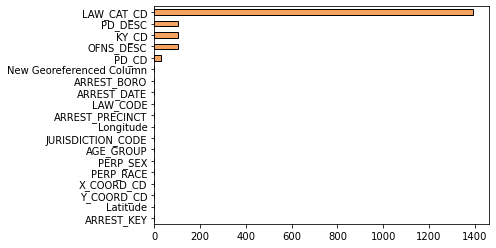

In [8]:
# checking null values in dataset
df.isnull().sum().sort_values(ascending=True).plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

The dataset has 155507 rows 19 columns. Observed inconsistencies are mentioned below.

## Data Inconsistencies

- Observed that 'LAW_CAT_CD' has 1393 null values (almost negligible since it has over 155k rows)
- There are very few null values in 'PD_CD','PD_DESC','KY_CD' and 'OFNS_DESC' as well.

## Data Cleaning

In [9]:
# converting 'Arrest_Date' to date type
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
# converting 'JURISDICTION_CODE' to categorical type
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                155507 non-null  int64         
 1   ARREST_DATE               155507 non-null  datetime64[ns]
 2   PD_CD                     155478 non-null  float64       
 3   PD_DESC                   155404 non-null  object        
 4   KY_CD                     155404 non-null  float64       
 5   OFNS_DESC                 155404 non-null  object        
 6   LAW_CODE                  155507 non-null  object        
 7   LAW_CAT_CD                154114 non-null  object        
 8   ARREST_BORO               155507 non-null  object        
 9   ARREST_PRECINCT           155507 non-null  int64         
 10  JURISDICTION_CODE         155507 non-null  object        
 11  AGE_GROUP                 155507 non-null  object        
 12  PE

In [11]:
# dropping location coordinate columns as they don't require in analysis
df = df.drop(['X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'],axis=1)
# dropping 'Arrest_key' column as it has all unique values
df = df.drop(['ARREST_KEY'],axis=1)

In [12]:
# Shape of dataset
df.shape

(155507, 13)

After dropping above columns, new dataset has 155,507 rows and 13 columns

## Sanity check to identify duplicates

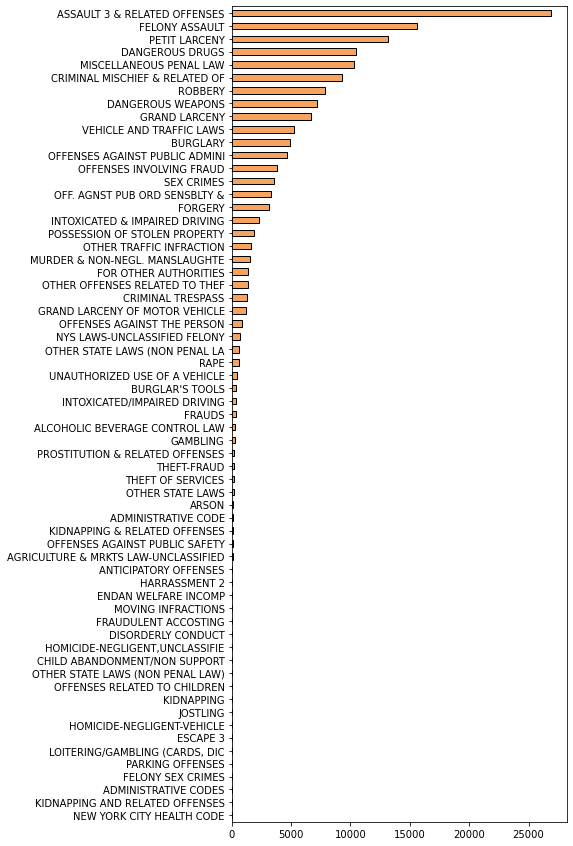

In [13]:
# checking 'offence description' column for duplicate values
df.OFNS_DESC.value_counts().sort_values(ascending=True).plot.barh(figsize=(6,15),color = 'sandybrown', edgecolor='k')
plt.show()

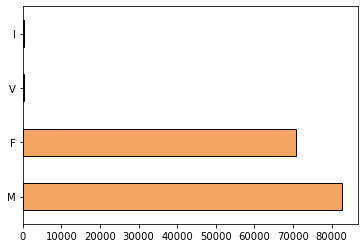

In [14]:
# Checking level of offence column
df.LAW_CAT_CD.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

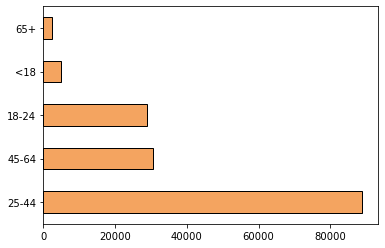

In [15]:
# Checking perpetrator's age group column
df.AGE_GROUP.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

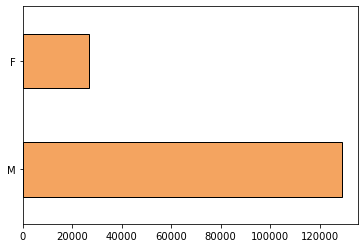

In [16]:
# Checking perpetrator's sex column
df.PERP_SEX.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

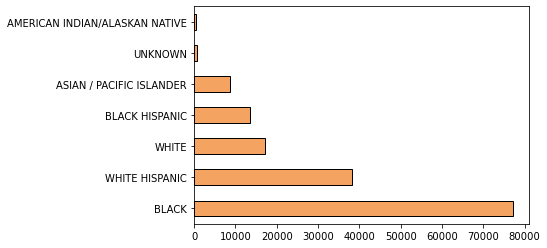

In [17]:
# Checking perpetrator's race column
df.PERP_RACE.value_counts().plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

### Observations

- The top three offenses are 'ASSAULT 3 & RELATED OFFENSES,' 'FELONY ASSAULT,' and 'PETIT LARCENY.'
- The highest level of offenses are'misdemeanor' and 'felony.'
- People aged 25 to 44 are more likely to engage in criminal activities.
- Males are more likely to commit crimes than females.
- The 'black' and 'white hispanic' races are more likely to commit crimes according to data.

## Distribution Plots

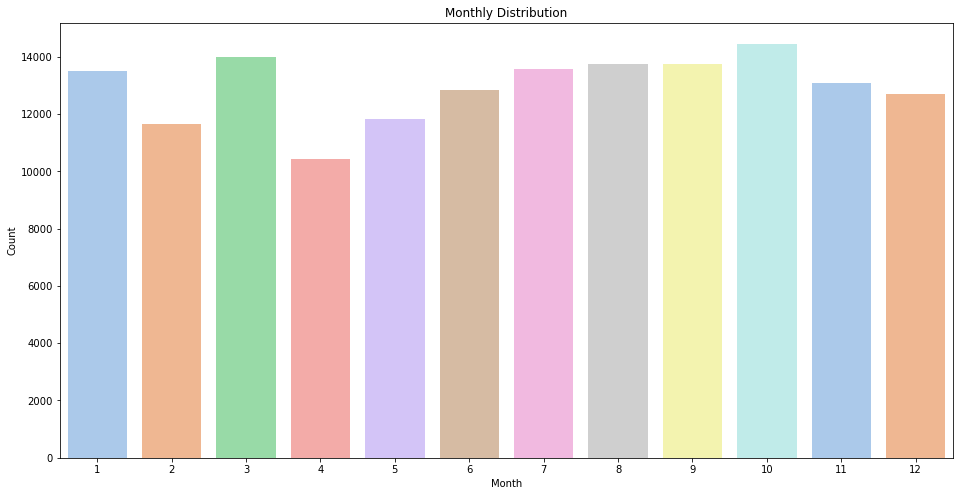

In [18]:
# Monthly distribution plot
sns.countplot(x=df.ARREST_DATE.dt.month, palette="pastel", data=df)
plt.gcf().set_size_inches(16,8)
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Observations

- 'April' is the month with the fewest arrests, while 'october' has the most.
- Arrests have risen from 'April' to 'october,' according to statistics.

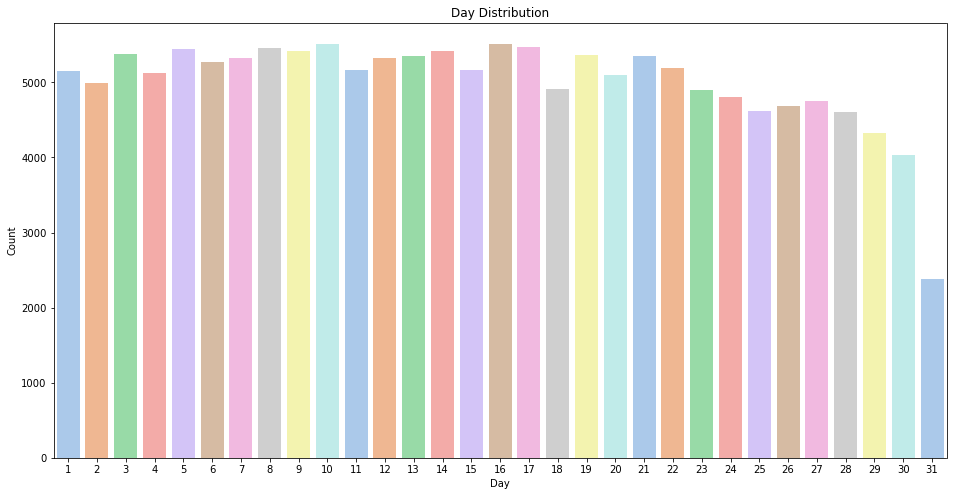

In [19]:
# Day distribution plot
sns.countplot(x=df.ARREST_DATE.dt.day, palette="pastel", data=df)
plt.gcf().set_size_inches(16,8)
plt.title('Day Distribution')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### Observations

- Up to the 21st of the month, the number of arrests is rather equally distributed.
- There is a significant decline in arrests from the 21st of the month to the end of the month.

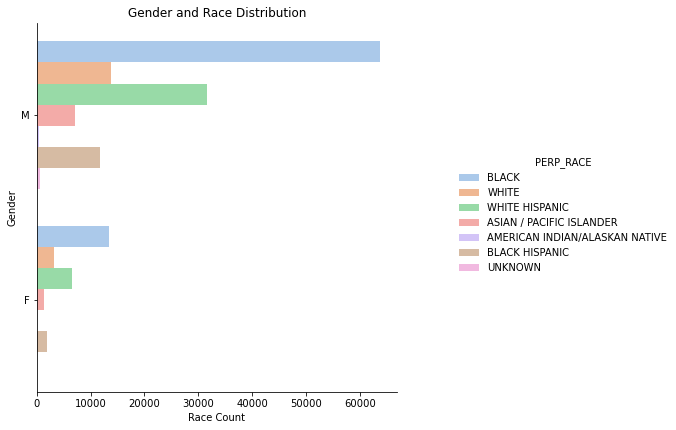

In [20]:
# Gender and Race Distribution
sns.catplot(y="PERP_SEX", hue="PERP_RACE", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(10,6)
plt.title('Gender and Race Distribution')
plt.xlabel('Race Count')
plt.ylabel('Gender')
plt.show()

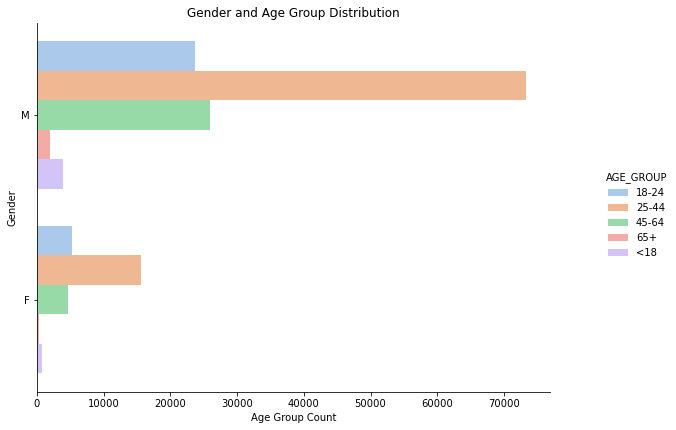

In [21]:
# Gender and Age Distribution
sns.catplot(y="PERP_SEX", hue="AGE_GROUP", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(10,6)
plt.title('Gender and Age Group Distribution')
plt.xlabel('Age Group Count')
plt.ylabel('Gender')
plt.show()

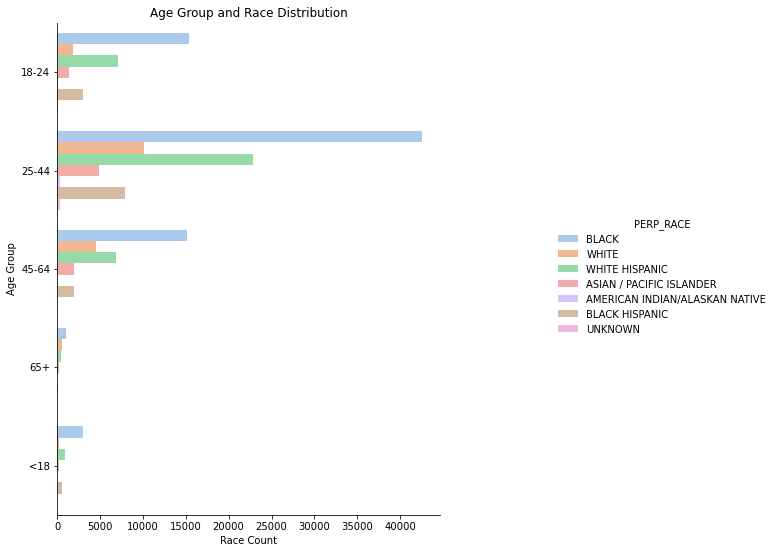

In [22]:
# Age and Race Distribution
sns.catplot(y="AGE_GROUP", hue="PERP_RACE", kind="count", palette="pastel", data=df)
plt.gcf().set_size_inches(12,8)
plt.title('Age Group and Race Distribution')
plt.xlabel('Race Count')
plt.ylabel('Age Group')
plt.show()

### Observations

- People of the 'Black' race are more likely to be detained in both genders.
- The age group '25-44' is involved in criminal activity in both male and female genders.
- 'Black' race individuals commit more crimes than those of other races at every age.

### converting ordinal feature to numeric

In [23]:
data_mapping = {
                '<18':   1,
                '18-24': 2,
                '25-44': 3,
                '45-64': 4,
                '65+':   5
                }

In [24]:
df['AGE_GRP_NUM'] = df['AGE_GROUP'].map(data_mapping)
df.head()

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,AGE_GRP_NUM
0,2021-12-18,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,2
1,2021-11-25,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,3
2,2021-10-14,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,3
3,2021-10-11,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,2
4,2021-09-28,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,3


- Considered 'AGE_GROUP' as ordinal feature, converted it to numerical feature and considered for analysis

### Target Variable Count

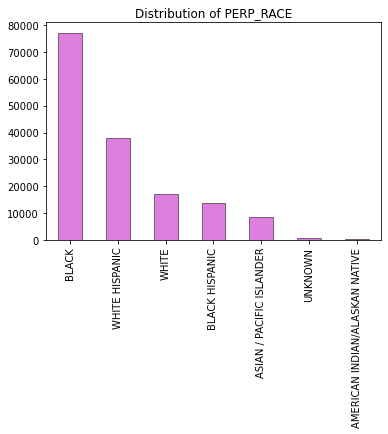

In [98]:
df['PERP_RACE'].value_counts().plot.bar(color = 'm', alpha = 0.5, edgecolor = 'k')
plt.title('Distribution of PERP_RACE')
plt.show()

- target variables are highly imbalanced.

# Modelling & Feature Engineering

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
import numpy as np

cat_vars = ['PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'JURISDICTION_CODE', 'PERP_SEX']
num_vars = ['PD_CD', 'KY_CD', 'ARREST_PRECINCT', 'AGE_GRP_NUM']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(missing_values= np.NaN, strategy='most_frequent')),
                         ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['PD_CD', 'KY_CD', 'ARREST_PRECINCT',
                                  'AGE_GRP_NUM']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['PD_DESC', 'OFNS_DESC', 'LAW_CODE',
      

- Considered 'median' for numeric features and 'most_frequent' for categorical features in simple imputer

In [32]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if (x != 'PERP_RACE')]

X = df[features]
y = df['PERP_RACE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Training data: {X_train.shape[0]:,}')
print(f'Test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training data: 124,405
Test data: 31,102

Features:
PD_CD
PD_DESC
KY_CD
OFNS_DESC
LAW_CODE
LAW_CAT_CD
ARREST_BORO
ARREST_PRECINCT
JURISDICTION_CODE
AGE_GROUP
PERP_SEX
AGE_GRP_NUM


## Logistic Regression Model

In [86]:
from sklearn.linear_model import LogisticRegression

lr_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear'))
             ])

params = {'model__C': [0.1, 1, 10, 50, 100]}
lr = GridSearchCV(lr_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
lr = lr.fit(X_train, y_train)

print(lr.best_estimator_)
print("\n")
print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- Used 'f1_weighted' for scoring due to high imbalance in the target variable.
- from the list of 'C' values the model is picked 50 for best validation score. 

In [87]:
lg_results = list(zip(lr.cv_results_['params'],
                      lr.cv_results_['mean_test_score'],
                      lr.cv_results_['std_test_score']
                     )
                 )

for i in lg_results:
    x = i[0]['model__C']
    print(f'C: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

C: 0.1, lower acc: 36.94%, mean acc: 37.16%, upper acc: 37.37%
C: 1, lower acc: 37.39%, mean acc: 37.57%, upper acc: 37.75%
C: 10, lower acc: 37.45%, mean acc: 37.66%, upper acc: 37.87%
C: 50, lower acc: 37.47%, mean acc: 37.68%, upper acc: 37.88%
C: 100, lower acc: 37.47%, mean acc: 37.67%, upper acc: 37.88%


- from hyper parameter tuning, we can observe mean accuracy is more for 'C' value 50.
- Performing secondary search with 'C' values [40,50,60]

In [54]:
from sklearn.linear_model import LogisticRegression

lr_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear'))
             ])

params = {'model__C': [40,50,60]}
lr = GridSearchCV(lr_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
lr = lr.fit(X_train, y_train)

print(lr.best_estimator_)
print("\n")
print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- from secondary search model again picked 'C' value as 50.
- again double checking hyper parameter tuning for 'C' values.

In [83]:
lg_results = list(zip(lr.cv_results_['params'],
                      lr.cv_results_['mean_test_score'],
                      lr.cv_results_['std_test_score']
                     )
                 )

for i in lg_results:
    x = i[0]['model__C']
    print(f'C: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

C: 40, lower acc: 37.47%, mean acc: 37.67%, upper acc: 37.88%
C: 50, lower acc: 37.47%, mean acc: 37.68%, upper acc: 37.88%
C: 60, lower acc: 37.47%, mean acc: 37.68%, upper acc: 37.88%


- mean accuracy for 'C' values 50 & 60 are the same. since model considered 'C' value as 50, I have taken the same value and developed the classification report.

In [84]:
from sklearn.metrics import classification_report

lr_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', LogisticRegression(C=50, solver='liblinear'))])
lr_model.fit(X_train,y_train)
logistic_predict = lr_model.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, logistic_predict))

Testing Scores:: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.00      0.00      0.00        89
      ASIAN / PACIFIC ISLANDER       0.50      0.04      0.07      1770
                         BLACK       0.51      0.96      0.67     15352
                BLACK HISPANIC       0.13      0.00      0.00      2655
                       UNKNOWN       0.00      0.00      0.00       121
                         WHITE       0.44      0.06      0.11      3480
                WHITE HISPANIC       0.38      0.08      0.13      7635

                      accuracy                           0.50     31102
                     macro avg       0.28      0.16      0.14     31102
                  weighted avg       0.44      0.50      0.38     31102



- Got accuracy of 50% and recall of 50% for 'weighted average' in Testing report. Let's see the training scores

In [104]:
lr_trainPre = lr_model.predict(X_train)
print("Training Scores for LR Model: Classification Report:\n")
print(classification_report(y_train, lr_trainPre))

Training Scores for LR Model: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.00      0.00      0.00       354
      ASIAN / PACIFIC ISLANDER       0.55      0.04      0.07      6823
                         BLACK       0.52      0.97      0.67     61781
                BLACK HISPANIC       0.58      0.01      0.02     10921
                       UNKNOWN       1.00      0.02      0.03       466
                         WHITE       0.47      0.07      0.12     13583
                WHITE HISPANIC       0.42      0.08      0.13     30477

                      accuracy                           0.51    124405
                     macro avg       0.50      0.17      0.15    124405
                  weighted avg       0.49      0.51      0.39    124405



- Got accuracy of 51% and recall of '51%' for training data. since the results are moderate let's see the roc curve

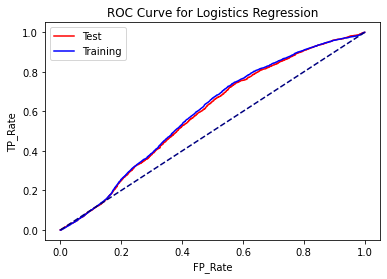

The area of curve is 0.6676475251113594


In [74]:
from sklearn.metrics import roc_curve

y_testprobability = lr_model.fit(X_train,y_train).predict_proba(X_test)
y_trainprobability = lr_model.fit(X_train,y_train).predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob, pos_label = 'WHITE')
    return fpr, tpr

fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovr')

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Logistics Regression')
plt.xlabel('FP_Rate')
plt.ylabel('TP_Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {auc}')

##### Overall observations on LR Model:
- Highest recall and f1-score is observed for 'BLACK' category.
- Highest precision is observed for 'UNKNOWN' category.
- The ROC curve has AUC of 0.67

## Decision Tree Model

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_p = Pipeline([('processing_pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [50,80,100], 'model__min_samples_split' : [0.001, 0.01, 0.05]}

dt = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
dt = dt.fit(X_train, y_train)

print(dt.best_estimator_)
print("\n")
print(f'Validation score: {dt.best_score_:.2%}')
print(f'Test score: {dt.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- Compared to Logistics Regression model, this model has better validation score.
- Final outcomes of the model are max_depth as 80 and min_samples_split as 0.001.

In [60]:
dt_results = list(zip(dt.cv_results_['params'],
                      dt.cv_results_['mean_test_score'],
                      dt.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['model__max_depth']
    y = i[0]['model__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 50, 0.10%: 50.34% < 50.84% > 51.33%
Depth/Min Split: 50, 1.00%: 48.27% < 48.72% > 49.18%
Depth/Min Split: 50, 5.00%: 45.37% < 45.69% > 46.02%
Depth/Min Split: 80, 0.10%: 50.38% < 50.84% > 51.29%
Depth/Min Split: 80, 1.00%: 48.26% < 48.72% > 49.18%
Depth/Min Split: 80, 5.00%: 45.37% < 45.69% > 46.02%
Depth/Min Split: 100, 0.10%: 50.35% < 50.83% > 51.31%
Depth/Min Split: 100, 1.00%: 48.26% < 48.72% > 49.17%
Depth/Min Split: 100, 5.00%: 45.37% < 45.69% > 46.02%


- From the above hyper parameter tuning, we can see model works best for max_depth of 80 and min_samples_split of 0.001
- doing secondary search with considering max_depth as [60,70,80,90] and min_samples_split values as [0.001,0.002,0.003]

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [60,70,80,90], 'model__min_samples_split' : [0.001, 0.002, 0.003]}

dt = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
dt = dt.fit(X_train, y_train)

print(dt.best_estimator_)
print("\n")
print(f'Validation score: {dt.best_score_:.2%}')
print(f'Test score: {dt.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- there is no change in validation score. model picked same values for 'max_depth' and 'min_samples_split'.
- double checking the new values with hyper parameter tuning.

In [63]:
dt_results = list(zip(dt.cv_results_['params'],
                      dt.cv_results_['mean_test_score'],
                      dt.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['model__max_depth']
    y = i[0]['model__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 60, 0.10%: 50.38% < 50.84% > 51.31%
Depth/Min Split: 60, 0.20%: 50.00% < 50.54% > 51.09%
Depth/Min Split: 60, 0.30%: 49.91% < 50.43% > 50.95%
Depth/Min Split: 70, 0.10%: 50.35% < 50.84% > 51.33%
Depth/Min Split: 70, 0.20%: 50.02% < 50.56% > 51.10%
Depth/Min Split: 70, 0.30%: 49.90% < 50.42% > 50.94%
Depth/Min Split: 80, 0.10%: 50.38% < 50.85% > 51.32%
Depth/Min Split: 80, 0.20%: 50.03% < 50.57% > 51.12%
Depth/Min Split: 80, 0.30%: 49.91% < 50.42% > 50.94%
Depth/Min Split: 90, 0.10%: 50.35% < 50.82% > 51.30%
Depth/Min Split: 90, 0.20%: 50.02% < 50.55% > 51.08%
Depth/Min Split: 90, 0.30%: 49.92% < 50.43% > 50.94%


- mean accuaracy is for 80, 0.01 is high for the model. So considered same values and developed classification report

In [64]:
dt_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', DecisionTreeClassifier(max_depth=80, min_samples_split=0.001))])

In [65]:
dt_model.fit(X_train,y_train)
decision_predict = dt_model.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, decision_predict))

Testing Scores:: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.00      0.00      0.00        89
      ASIAN / PACIFIC ISLANDER       0.41      0.22      0.28      1770
                         BLACK       0.61      0.84      0.70     15352
                BLACK HISPANIC       0.29      0.07      0.11      2655
                       UNKNOWN       0.09      0.01      0.02       121
                         WHITE       0.45      0.31      0.36      3480
                WHITE HISPANIC       0.44      0.35      0.39      7635

                      accuracy                           0.55     31102
                     macro avg       0.33      0.26      0.27     31102
                  weighted avg       0.51      0.55      0.51     31102



- results are much better than logistic regression model. we got accuracy of 55% and recall of 55%. Let's see the training scores

In [105]:
dt_trainPre = dt_model.predict(X_train)
print("Training Scores for DT Model: Classification Report:\n")
print(classification_report(y_train, dt_trainPre))

Training Scores for DT Model: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.53      0.07      0.12       354
      ASIAN / PACIFIC ISLANDER       0.51      0.29      0.37      6823
                         BLACK       0.64      0.88      0.74     61781
                BLACK HISPANIC       0.57      0.13      0.22     10921
                       UNKNOWN       0.84      0.09      0.16       466
                         WHITE       0.53      0.37      0.43     13583
                WHITE HISPANIC       0.53      0.41      0.46     30477

                      accuracy                           0.60    124405
                     macro avg       0.59      0.32      0.36    124405
                  weighted avg       0.59      0.60      0.57    124405



- Training score accuracy is at 60% which is 9% more than logistic regression model. let's plot the roc curve.

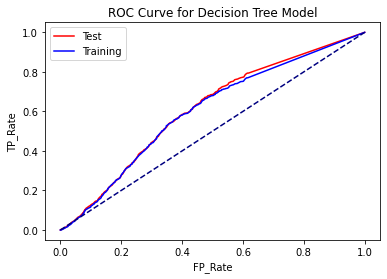

The area of curve is 0.682824935906483


In [77]:
from sklearn.metrics import roc_auc_score
y_testprobability = dt_model.fit(X_train,y_train).predict_proba(X_test)
y_trainprobability = dt_model.fit(X_train,y_train).predict_proba(X_train)

fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovr')

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Decision Tree Model')
plt.xlabel('FP_Rate')
plt.ylabel('TP_Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {auc}')

##### Overall observations on DT Model:
- Highest recall and f1-score is observed for 'BLACK' category.
- Highest precision is observed for 'UNKNOWN' category.
- The ROC curve has AUC of 0.68 which is 0.01 greater than LR model

## KNeighborsClassifier Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_p = Pipeline([('processing_pipeline', processing_pipeline),
                  ('knn_classifier',KNeighborsClassifier())])
params = {'knn_classifier__n_neighbors':[1,5,10]}
knn = GridSearchCV(estimator=knn_p, param_grid=params, scoring='f1_weighted', refit=True, cv=5)
knn = knn.fit(X_train, y_train)
print(knn.best_estimator_)
print("\n")
print(f'Validation score: {knn.best_score_:.2%}')
print(f'Test score: {knn.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- KNN model has better validation score than logistic regression and slightly lower than dt model.
- Final outcomes of the model is n_neighbors is 10.

In [79]:
knn_results = list(zip(knn.cv_results_['params'],
                      knn.cv_results_['mean_test_score'],
                      knn.cv_results_['std_test_score']
                     )
                 )

for i in knn_results:
    x = i[0]['knn_classifier__n_neighbors']
    print(f'neighbors: {x}, {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

neighbors: 1, 43.98% < 44.27% > 44.55%
neighbors: 5, 47.11% < 47.29% > 47.47%
neighbors: 10, 47.32% < 47.46% > 47.60%


- from the above hyperparameter tuning, we can see mean accuracy is more for n_neighbours 10.
- doing secondary search with n_neighbours as [10,20,50]

In [80]:
knn_p = Pipeline([('processing_pipeline', processing_pipeline),
                  ('knn_classifier',KNeighborsClassifier())])
params = {'knn_classifier__n_neighbors':[10, 20, 50]}
knn = GridSearchCV(estimator=knn_p, param_grid=params, scoring='f1_weighted', refit=True, cv=5)
knn = knn.fit(X_train, y_train)
print(knn.best_estimator_)
print("\n")
print(f'Validation score: {knn.best_score_:.2%}')
print(f'Test score: {knn.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['PD_CD', 'KY_CD',
                                                   'ARREST_PRECINCT',
                                                   'AGE_GRP_NUM']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                           

- There is no difference in validation score. model picked same values for best output.
- double checking with hyperparameter tuning.

In [81]:
knn_results = list(zip(knn.cv_results_['params'],
                      knn.cv_results_['mean_test_score'],
                      knn.cv_results_['std_test_score']
                     )
                 )

for i in knn_results:
    x = i[0]['knn_classifier__n_neighbors']
    print(f'neighbors: {x}, {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

neighbors: 10, 47.32% < 47.46% > 47.60%
neighbors: 20, 46.27% < 46.52% > 46.76%
neighbors: 50, 43.86% < 44.10% > 44.33%


- we can observe n_neighbours 10 has high mean acuracy than other two parameters. considering the same values and implementing the classification report.

In [69]:
knn_model = Pipeline([('processing_pipeline', processing_pipeline),
                  ('knn_classifier',KNeighborsClassifier(n_neighbors=10))])

print("Testing Scores:: Classification Report:\n")
knn_model.fit(X_train,y_train)
decision_predict = knn_model.predict(X_test)
print(classification_report(y_test, decision_predict))

Testing Scores:: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.00      0.00      0.00        89
      ASIAN / PACIFIC ISLANDER       0.34      0.21      0.26      1770
                         BLACK       0.58      0.82      0.68     15352
                BLACK HISPANIC       0.28      0.07      0.11      2655
                       UNKNOWN       0.00      0.00      0.00       121
                         WHITE       0.41      0.25      0.31      3480
                WHITE HISPANIC       0.42      0.29      0.34      7635

                      accuracy                           0.52     31102
                     macro avg       0.29      0.24      0.24     31102
                  weighted avg       0.48      0.52      0.48     31102



- This model has training accuracy of 52% with testing data. let's see the training report.

In [106]:
knn_trainPre = knn_model.predict(X_train)
print("Training Scores for KNN Model: Classification Report:\n")
print(classification_report(y_train, knn_trainPre))

Training Scores for KNN Model: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.50      0.01      0.02       354
      ASIAN / PACIFIC ISLANDER       0.42      0.27      0.33      6823
                         BLACK       0.61      0.86      0.72     61781
                BLACK HISPANIC       0.43      0.11      0.18     10921
                       UNKNOWN       0.58      0.02      0.05       466
                         WHITE       0.50      0.31      0.38     13583
                WHITE HISPANIC       0.51      0.36      0.42     30477

                      accuracy                           0.58    124405
                     macro avg       0.51      0.28      0.30    124405
                  weighted avg       0.55      0.58      0.53    124405



- The training model has accuracy of 58% which is slightly lower than dt model. plotting ROC curve.

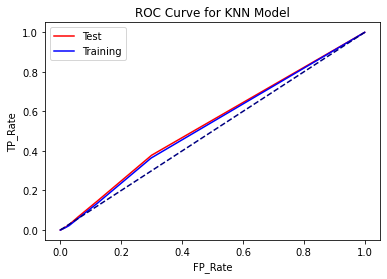

The area of curve is 0.63788716171104


In [102]:
y_testprobability = knn_model.fit(X_train,y_train).predict_proba(X_test)
y_trainprobability = knn_model.fit(X_train,y_train).predict_proba(X_train)

fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovr')

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for KNN Model')
plt.xlabel('FP_Rate')
plt.ylabel('TP_Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {auc}')

##### Overall observations on KNN Model:
- Highest precision,recall and f1-score is observed for 'BLACK' category.
- The ROC curve has AUC of 0.64 which is lower than both models.

## Conclusion & Recommended Model

In [107]:
print("Training Scores for LR Model: Classification Report:\n")
print(classification_report(y_train, lr_trainPre))
print("Training Scores for DT Model: Classification Report:\n")
print(classification_report(y_train, dt_trainPre))
print("Training Scores for KNN Model: Classification Report:\n")
print(classification_report(y_train, knn_trainPre))

Training Scores for LR Model: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.00      0.00      0.00       354
      ASIAN / PACIFIC ISLANDER       0.55      0.04      0.07      6823
                         BLACK       0.52      0.97      0.67     61781
                BLACK HISPANIC       0.58      0.01      0.02     10921
                       UNKNOWN       1.00      0.02      0.03       466
                         WHITE       0.47      0.07      0.12     13583
                WHITE HISPANIC       0.42      0.08      0.13     30477

                      accuracy                           0.51    124405
                     macro avg       0.50      0.17      0.15    124405
                  weighted avg       0.49      0.51      0.39    124405

Training Scores for DT Model: Classification Report:

                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN 

#### Based on above results, I would consider Decision Tree model for predicting race.
#### We can use better modelling techniques to improve the accuracy of class imbalances.